# Digit Recognizer

The goal of this project is to correctly identify digits using the MNIST ("Modified National Institute of Standards and Technology") dataset, which includes tens of thousands of handwritten images. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

Practice Skills:
<br> Computer vision fundamentals including simple neural networks
<br> Classification methods such as SVM and K-nearest neighbors

### Import Packages

In [3]:
import zipfile
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
import warnings
warnings.filterwarnings('ignore')

### Data Description
The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.

Visually, if we omit the "pixel" prefix, the pixels make up the image like this:

`000 001 002 003 ... 026 027
028 029 030 031 ... 054 055
056 057 058 059 ... 082 083
 |   |   |   |  ...  |   |
728 729 730 731 ... 754 755
756 757 758 759 ... 782 783`

The test data set, (test.csv), is the same as the training set, except that it does not contain the "label" column.

#### Kaggle Submission Instructions

Your submission file should be in the following format: For each of the 28000 images in the test set, output a single line containing the ImageId and the digit you predict. For example, if you predict that the first image is of a 3, the second image is of a 7, and the third image is of a 8, then your submission file would look like:

ImageId,Label
1,3
2,7
3,8 
(27997 more lines)
The evaluation metric for this contest is the categorization accuracy, or the proportion of test images that are correctly classified. For example, a categorization accuracy of 0.97 indicates that you have correctly classified all but 3% of the images.

### Data Download
In order to run the following command, kaggle must be installed with `'pip install kaggle'` and an API token must be in your directory `'.kaggle/kaggle.json'`. You can get this API token by going to your kaggle account page and clicking "Create New API Token". For a detailed instructions on how to do this, visit https://www.kaggle.com/docs/api

In [3]:
# Download the MNIST dataset from kaggle into the data folder
# ! kaggle competitions download -c digit-recognizer -p ../data

In [4]:
# # Extract the zipfile
# with zipfile.ZipFile("../data/digit-recognizer.zip","r") as zip_ref:
#     zip_ref.extractall("../data")

In [4]:
# Create a pandas dataframe from train csv
data = '../data/train.csv'
df = pd.read_csv(data)

### Data Exporation

In [5]:
# Use .info() to see the size of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [6]:
df.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

There are no missing values so we can move forward

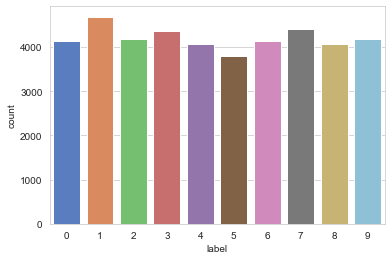

In [7]:
# Visualize the distribution of labels in our training data
# Our labels will be the numbers 0-9
sns.set_style("whitegrid")
sns.countplot(df['label'], palette = 'muted');

### Preprocess Data for Modeling

In [8]:
# Split the data into target(label) and features
y = df['label']
X = df.drop('label', axis=1)

# OneHotEncode labels for our model to understand
y = to_categorical(y, num_classes = 10)

# Normalize the values from 0 to 1
X = X/255

# Split intro train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Model - Neural Network

In [9]:
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(X_train, y_train, validation_split=0.2, epochs=5)

Epoch 1/5
704/704 [==============================] - 1s 928us/step - loss: 0.1474 - accuracy: 0.9569 - val_loss: 0.2338 - val_accuracy: 0.9391
Epoch 2/5
704/704 [==============================] - 1s 886us/step - loss: 0.1465 - accuracy: 0.9577 - val_loss: 0.2565 - val_accuracy: 0.9302
Epoch 3/5
704/704 [==============================] - 1s 874us/step - loss: 0.1428 - accuracy: 0.9586 - val_loss: 0.2455 - val_accuracy: 0.9366
Epoch 4/5
704/704 [==============================] - 1s 836us/step - loss: 0.1399 - accuracy: 0.9595 - val_loss: 0.2473 - val_accuracy: 0.9325
Epoch 5/5
704/704 [==============================] - 1s 849us/step - loss: 0.1397 - accuracy: 0.9575 - val_loss: 0.2485 - val_accuracy: 0.9376


#### Model Evaluation

In [16]:
results = model.evaluate(X_test, y_test, batch_size=128)

109/109 [==============================] - 0s 771us/step - loss: 0.2628 - accuracy: 0.9302


### Model - Convolutional Neural Network